In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import warnings

warnings.filterwarnings("ignore")
mousedata="mousedata.csv"
trialdata="trialdata.csv"

In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
# Combine the data into a single dataset
# Display the data table for preview

mouse=pd.read_csv(mousedata)
trial=pd.read_csv(trialdata)
data=pd.merge(mouse,trial)
data.head(2)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0


In [3]:
#Tumor Response to Treatment:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
VolumeMean=data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
VolumeMean.head(2)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086


In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Preview that Reformatting worked
MeanData=VolumeMean.pivot_table(index="Timepoint",columns="Drug", values='Tumor Volume (mm3)')
MeanData.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
VolumeError=data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
VolumeError=VolumeError.reset_index()
VolumeError.head(2)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593


In [6]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
SemData=VolumeError.pivot_table(index="Timepoint",columns="Drug", values='Tumor Volume (mm3)')
SemData.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.18895


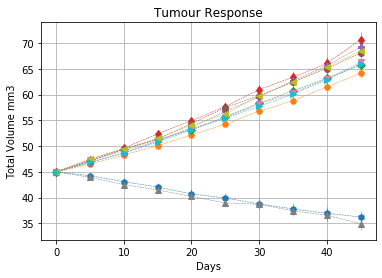

In [7]:
# Generate the Plot (with Error Bars)
# Save the Figure
#plt.savefig('plot1.png')
# Show the Figure

AxisX = MeanData.index
treatments=MeanData.columns
StEr=VolumeError.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
filled_markers=('h', 'H', 'D', 'd', 'P','o', 'v', '^', '<', '>', '8', 's', 'p', '*','X')

for i in range (len(treatments)):
    plt.errorbar(AxisX, MeanData[treatments[i]], yerr=StEr[treatments[i]],linestyle='dashed', marker=filled_markers[i], linewidth=.5)
plt.title("Tumour Response")
plt.ylabel("Total Volume mm3")
plt.xlabel("Days")
plt.grid()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Tumour_Response.png")
plt.show()

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
MetMean=data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
MetMean=MetMean.to_frame()
MetMean.head(2)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                      0.00
          5                      0.16

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
MetError=data.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
MetError= pd.DataFrame(MetError)
MetError.head(2)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833

In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
MetMean=MetMean.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
MetMean.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.000000,0.00,0.000000,0.00000,0.000,0.00,0.00,0.00,0.000000
5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667


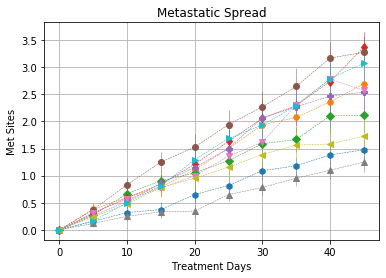

In [11]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
AxisX = MetMean.index
treatments=MetMean.columns
StEr=MetError.reset_index().pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
filled_markers=('h', 'H', 'D', 'd', 'P','o', 'v', '^', '<', '>', '8', 's', 'p', '*','X')

for i in range (len(treatments)):
    plt.errorbar(AxisX, MetMean[treatments[i]], yerr=StEr[treatments[i]],linestyle='dashed', marker=filled_markers[i], linewidth=.5)
plt.title("Metastatic Spread")
plt.ylabel("Met Sites")
plt.xlabel("Treatment Days")
plt.grid()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Metastatic.png")
plt.show()

In [12]:
#Survival Rates
# Store the Count of Mice Grouped by Drug and Timepoint
    #(W can pass any metric)
# Convert to DataFrame
# Preview DataFrame 
MiceCount=data.groupby(['Drug', "Timepoint"], as_index=True)['Mouse ID'].count()
MiceCount=MiceCount.reset_index().rename(columns={"Mouse ID": "Mouse Count"})
MiceCount.head(2)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25


In [13]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
MiceCountPivot=MiceCount.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
MiceCountPivot.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24


No handles with labels found to put in legend.


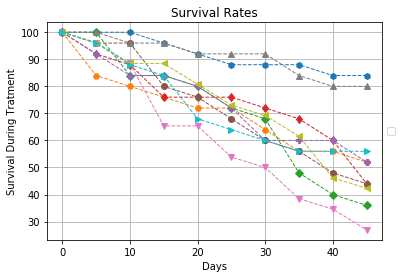

In [14]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
#plt.show()
AxisX=MiceCountPivot.index
treatments=MiceCountPivot.columns
for i in range (len(treatments)):
        surv_rates = (MiceCountPivot[treatments[i]] / MiceCountPivot[treatments[i]][0]) * 100
        plt.plot(AxisX, surv_rates,linestyle='dashed',marker=filled_markers[i],linewidth=1)
plt.title("Survival Rates")
plt.ylabel("Survival During Tratment")
plt.xlabel("Days")
plt.grid()
plt.legend(loc="center left",bbox_to_anchor=(1, 0.5))
plt.savefig("Survival.png")
plt.show()

In [22]:
#Summary Bar Graph
# Calculate the percent changes for each drug
# Display the data to confirm
TumorChange=(MeanData.iloc[-1]/(MeanData.iloc[0])-1)*100
print(TumorChange)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


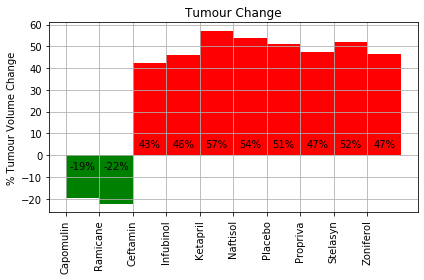

In [35]:
# Store all Relevant Percent Changes into a Tuple
TheList=zip(TumorChange.reset_index()["Drug"], TumorChange.values)
ChangesList=list(TheList)
# Splice the data between passing and failing drugs
passed=[]
failed=[]

for drug in ChangesList:
    if drug [1]<0:
        passed.append(drug)
    else:
        failed.append(drug)
        
# Orient widths. Add labels, tick marks, etc. 
druglabels = [passed[i][0] for i in np.arange(len(passed))]
druglabels.extend([failed[i][0] for i in np.arange(len(failed))])

barwidth=1
PassPct = [passed[i][1] for i in np.arange(len(passed))]
FailPct = [failed[i][1] for i in np.arange(len(failed))]
PassBar = plt.bar(np.arange(len(passed)), 
                    PassPct, 
                    color='green', align='edge', width=barwidth)
FailBar = plt.bar(np.arange(len(passed), len(ChangesList)), 
                    FailPct, 
                    color='red', align='edge', width=barwidth)
plt.grid()
plt.title("Tumour Change")
plt.ylabel("% Tumour Volume Change")
plt.xticks(np.arange(len(ChangesList)), druglabels, rotation='vertical')

# Use functions to label the percentages of changes
def PltPC(PassBar, FailBar, PassPct, FailPct):
    pass_y = -5
    for PassBar, PassPct in zip(PassBar, PassPct):
        plt.text(PassBar.get_x() + PassBar.get_width()/2, pass_y, str(f"{PassPct:.0f}%"),
                 horizontalalignment='center', verticalalignment='center')
    fail_y = 5
    for FailBar, FailPct in zip(FailBar, FailPct):
        plt.text(FailBar.get_x() + FailBar.get_width()/2, fail_y, str(f"{FailPct:.0f}%"),
                horizontalalignment='center', verticalalignment='center')

# Call functions to implement the function calls
PltPC(PassBar, FailBar, PassPct, FailPct)

# Save the Figure
plt.tight_layout()
plt.savefig("Changes.png", bbox_inches='tight')

# Show the Figure
plt.show()


In [53]:
#Include 3 observations about the results of the study. Use the 
#visualizations you generated from the study data as the basis for your 
#observations.
print("OBSERVATIONS:\
a- All treatments, compared to Ketapril, can slow the vol growth, but only two can revert it\
b- Capomulin and Ramicane are the most succesfull treatments\
c- Ramicane can reduce the size of tumor faster than any other.")

OBSERVATIONS:a- All treatments, compared to Ketapril, can slow the vol growth, but only two can revert itb- Capomulin and Ramicane are the most succesfull treatmentsc- Ramicane can reduce the size of tumor faster than any other.


In [ ]:
#You must use the Pandas Library and the Jupyter Notebook.
#You must use the Matplotlib library.
#You must include a written description of three observable trends based 
    #on the data.
#You must use proper labeling of your plots, including aspects like: 
    #Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
#Your scatter plots must include error bars. This will allow the company 
    #to account for variability between mice. You may want to look 
    #into pandas.DataFrame.sem for ideas on how to calculate this.
#Remember when making your plots to consider aesthetics!
    #Your legends should not be overlaid on top of any data.
    #Your bar graph should indicate tumor growth as red and tumor 
        #reduction as green.
    #It should also include a label with the percentage change for each 
        #bar. You may want to consult this tutorial for relevant code 
        #snippets.
#See Starter Workbook for a reference on expected format. (Note: For 
    #this example, you are not required to match the tables or data 
    #frames included. Your only goal is to build the scatter plots 
    #and bar graphs. Consider the tables to be potential clues, but 
    #feel free to approach this problem, however, you like.)


#Hints and Considerations
#Be warned: These are very challenging tasks. Be patient with yourself 
    #as you trudge through these problems. They will take time and 
    #there is no shame in fumbling along the way. Data visualization 
    #is equal parts exploration, equal parts resolution.
#You have been provided a starter notebook. Use the code comments as a 
    #guideline of steps you may wish to follow as you complete the 
    #assignment. You do not have to follow them step-for-step. Do not 
    #get bogged down in trying to interpret and accomplish each step.
#The Pymaceuticals example will require you to research a good bit on 
    #your own for hacked solutions to problems you'll experience along 
    #the way. Feel encouraged to constantly refer to Stack Overflow and 
    #the Pandas Documentation. These are needed tools in every data 
    #analyst's arsenal.
#Don't get bogged down in small details. Always focus on the big 
    #picture. If you can't figure out how to get a label to show up 
    #correctly, come back to it. Focus on getting the core skeleton of 
    #your notebook complete. You can always re-visit old problems.
#Remember: There are many ways to skin a cat, and similarly there are 
    #many ways to approach a data problem. The key throughout, however, 
    #is to break up your task into micro tasks. Try answering questions 
    #like: "How does my Data Frame need to be structured for me to have 
    #the right X and Y axis?" "How do I build a basic scatter plot?" 
    #"How do I add a label to that scatter plot?" "Where would the labels
    #for that scatter plot come from?". Again! Don't let the magnitude of 
    #a programming task scare you off. Ultimately, every programming 
    #problem boils down to a handful of smaller, bite-sized tasks.
#Get help when you need it! There is never any shame in asking. But 
    #as always, ask a specific question. You'll never get a great answer 
    #to: "I'm lost." Good luck!